# 2. Solving simultaneous equations
x + y + z = 6,
2y + 5z = -4,
2x + 5y -z = 27
#import numpy library to manage arrays or lists


In [9]:
import numpy as np

In [10]:
#Assign array a and print it
a = np.array([[1,1,1],[0,2,5],[2,5,-1]])
print(a)


[[ 1  1  1]
 [ 0  2  5]
 [ 2  5 -1]]


In [11]:
#Assign array b and print it
b = np.array([[6],[-4],[27]])

print(b)

[[ 6]
 [-4]
 [27]]


In [14]:
# Find inverse of a
Ainv = np.linalg.inv(a)
print(Ainv)

[[ 1.28571429 -0.28571429 -0.14285714]
 [-0.47619048  0.14285714  0.23809524]
 [ 0.19047619  0.14285714 -0.0952381 ]]


In [15]:
# multiply a inverse with b
c = Ainv.dot(b)
print(c)

[[ 5.]
 [ 3.]
 [-2.]]


In [16]:
# using solve method to calculate
d =np.linalg.solve(a,b)
print(d)

[[ 5.]
 [ 3.]
 [-2.]]


# x = 5, y = 3, z = -2

In [17]:
# validate the result
check = a.dot(d)
print(check)

[[ 6.]
 [-4.]
 [27.]]


In [18]:
# validate using allclose method
np.allclose(np.dot(a, c), b)

True

In [19]:
# one equation to solve the problem
onestmt = np.linalg.inv(a).dot(b)
print(onestmt)

[[ 5.]
 [ 3.]
 [-2.]]


In [20]:
# validate using allclose method
np.allclose(np.dot(a, onestmt), b)

True

# 3. The following dataset of size n = 31 provides employee-wise salary. The variables are y = salary of an individual employee and x = years of experience of each individual employee .Find the intercept, coefficient value and error term for this regression problem in Python. How would you convey (interpret) these results in a business context?

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import xlrd as xlrd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import math


In [185]:
employee_data_df = pd.read_csv('Salary_Data.csv')

In [186]:
print(employee_data_df)
employee_data_df.columns

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


Index(['YearsExperience', 'Salary'], dtype='object')

In [187]:
employee_data_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [188]:
employee_data_df.shape

(30, 2)

In [189]:
employee_data_df.info

<bound method DataFrame.info of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [190]:
employee_data_df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [191]:
employee_data_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


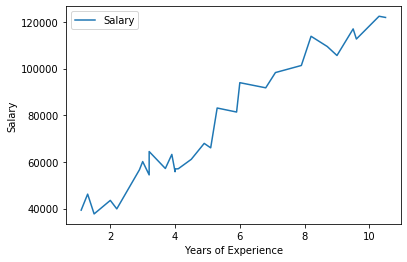

In [192]:
employee_data_df.plot(x='YearsExperience',y='Salary')
#plt.scatter('YearsExperience','Salary',data=employee_data_df)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [193]:
#plt.figure(figsize=(15,10))
#plt.tight_layout()
#sns.distplot(employee_data_df['YearsExperience'])

In [194]:
x = employee_data_df['YearsExperience'].values.reshape(-1,1)
y = employee_data_df['Salary']

#y /= 10000                                                   
y = y.values.reshape(-1,1)

print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]


In [195]:
reg = LinearRegression()
#reg.fit(employee_data_df['YearsExperience'],employee_data_df['Salary'])
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [196]:
print(reg.coef_)
print(reg.intercept_)


[[9449.96232146]]
[25792.20019867]


In [197]:
#plt.plot(x,y)

In [198]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=0)

In [207]:
reg.fit(x_train,y_train)
print('Coef:' ,reg.coef_)
print('intercept: ',reg.intercept_)
y_pred = reg.predict(x_test)

#print(reg.coef_)
print(y_test)
print(y_pred)

Coef: [[9360.26128619]]
intercept:  [26777.3913412]
[[ 37731.]
 [122391.]
 [ 57081.]
 [ 63218.]
 [116969.]
 [109431.]
 [112635.]
 [ 55794.]
 [ 83088.]]
[[ 40817.78327049]
 [123188.08258899]
 [ 65154.46261459]
 [ 63282.41035735]
 [115699.87356004]
 [108211.66453108]
 [116635.89968866]
 [ 64218.43648597]
 [ 76386.77615802]]


In [200]:
#y_pred = reg.predict([[1.1]])
#print(y_pred)

[[37073.67875601]]


In [201]:
 y_pred = reg.predict(x_test)

In [209]:
mse=mean_squared_error(y_test,y_pred)
#print(mse)
rmse = math.sqrt(mse)
print('RMSE = ', math.sqrt(mse))
print('Variance score = %.2f' % r2_score(y_test, y_pred))

RMSE =  4834.260936361728
Variance score = 0.97


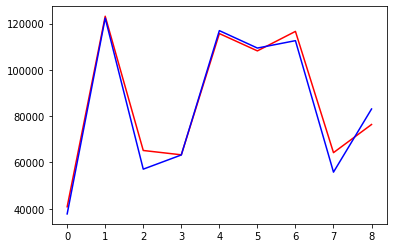

In [210]:
plt.plot(y_pred,color ='red')
plt.plot(y_test,color = 'blue')
plt.show()

# With the provided training dataset -> The starting salary of an employee would be approx.26777 and it will be incremented approx.9360 with the no.of years fo experience.

# By providing more data samples will enforce the model to be more accurate to different data points.

# This model may not be accurate in case of more outliers in the dataset. 